In [1]:
#Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from datetime import datetime

In [2]:
df_train = pd.read_csv("C:\\Users\HP\\Downloads\\train_file.csv")
df_test = pd.read_csv("C:\\Users\HP\\Downloads\\test_file.csv")

C:\Users\HP\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df_train.head()

,ID,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,ADDRESS,CITY,STATE,ZIP CODE,...,LICENSE TERM START DATE,LICENSE TERM EXPIRATION DATE,LICENSE APPROVED FOR ISSUANCE,DATE ISSUED,LICENSE STATUS CHANGE DATE,SSA,LATITUDE,LONGITUDE,LOCATION,LICENSE STATUS
0,35342-20020816,1256593,32811,1,CARMEN CAHUE,CLAUDIA'S BRIDAL SHOP,2625 S CENTRAL PARK AVE 1,CHICAGO,IL,60623.0,...,2002-08-16T00:00:00,2003-08-15T00:00:00,2002-08-21T00:00:00,2006-04-11T00:00:00,NaN,25.0,41.843613,-87.714618,"{'latitude': '41.843612879431845', 'longitude'...",AAI
1,1358463-20051116,1639294,262311,29,"ISLA TROPICAL, INC.",ISLA TROPICAL,2825 W MONTROSE AVE,CHICAGO,IL,60618,...,2005-11-16T00:00:00,2006-11-15T00:00:00,2006-04-05T00:00:00,2006-06-12T00:00:00,2006-06-15T00:00:00,60.0,41.961132,-87.699626,"{'latitude': '41.96113244107215', 'longitude':...",AAC
2,1980233-20090722,1980233,345008,1,DJS REMODELING,"DJS REMODELING, INC.",1605 CLAVEY RD 1,HIGHLAND,IL,60035,...,2009-07-22T00:00:00,2011-07-15T00:00:00,2009-07-22T00:00:00,2009-07-22T00:00:00,NaN,NaN,NaN,NaN,NaN,AAI
3,1476582-20040211,1476582,273121,1,ALL-BRY CONSTRUCTION CO.,ALL-BRY CONSTRUCTION CO.,8 NORTH TRAIL,LEMONT,IL,60439,...,2004-02-11T00:00:00,2005-02-15T00:00:00,2004-02-10T00:00:00,2004-02-11T00:00:00,NaN,NaN,NaN,NaN,NaN,AAI
4,1141408-20080516,1896750,213785,1,MCDONOUGH MECHANICAL SERVICE,MCDONOUGH MECHANICAL SERVICE,4081 JOSEPH DR,WAUKEGAN,IL,60087,...,2008-05-16T00:00:00,2010-05-15T00:00:00,2008-06-04T00:00:00,2008-06-05T00:00:00,NaN,NaN,NaN,NaN,NaN,AAI


In [4]:
df_train.shape

(85895, 32)

In [5]:
df_test.head()

,ID,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,ADDRESS,CITY,STATE,ZIP CODE,...,CONDITIONAL APPROVAL,LICENSE TERM START DATE,LICENSE TERM EXPIRATION DATE,LICENSE APPROVED FOR ISSUANCE,DATE ISSUED,LICENSE STATUS CHANGE DATE,SSA,LATITUDE,LONGITUDE,LOCATION
0,1516615-20120216,2132209,280120,1,RS HOMES I LLC,RS HOMES I LLC,350 W HUBBARD ST 3 300,CHICAGO,IL,60610.0,...,N,2012-02-16T00:00:00,2014-02-15T00:00:00,2012-01-19T00:00:00,2012-01-20T00:00:00,2012-12-29T00:00:00,NaN,41.890047,-87.637467,"{'latitude': '41.89004724888915', 'longitude':..."
1,69813-20110616,2090759,65043,1,CSX INTERMODAL INC,CSX INTERMODAL,2101 W 59TH ST 1ST,CHICAGO,IL,60636.0,...,N,2011-06-16T00:00:00,2013-06-15T00:00:00,2012-11-02T00:00:00,2012-11-05T00:00:00,2012-12-29T00:00:00,NaN,41.786485,-87.676665,"{'latitude': '41.786485235679486', 'longitude'..."
2,1519227-20041116,1541990,281270,1,LOCOMIBILE LOFTS LLC,LOCOMOBILE LOFTS LLC,1133 S WABASH AVE 1ST,CHICAGO,IL,60605.0,...,N,2004-11-16T00:00:00,2005-11-15T00:00:00,2004-12-06T00:00:00,2004-12-07T00:00:00,NaN,NaN,41.868269,-87.625695,"{'latitude': '41.86826924843568', 'longitude':..."
3,1922025-20100816,2041053,335243,1,ANNA F. JAMISON,ANNA F. JAMISON,13156 S FORRESTVILLE AVE,CHICAGO,IL,60827.0,...,N,2010-08-16T00:00:00,2012-08-15T00:00:00,NaN,2010-11-04T00:00:00,2012-12-31T00:00:00,NaN,41.655762,-87.608686,"{'latitude': '41.65576175146191', 'longitude':..."
4,1675683-20070816,1837158,283018,3,MARINCA A. COVARRUBIAS,DETAILS,4208 S ARCHER AVE,CHICAGO,IL,60632.0,...,N,2007-08-16T00:00:00,2009-06-15T00:00:00,2007-08-15T00:00:00,2007-08-16T00:00:00,2008-03-26T00:00:00,39.0,41.816969,-87.699785,"{'latitude': '41.81696910012824', 'longitude':..."


In [6]:
df_test.shape

(57239, 31)

In [7]:
#Exploring the dataset.

In [8]:
#Checking the columns
df_train.columns

Index(['ID', 'LICENSE ID', 'ACCOUNT NUMBER', 'SITE NUMBER', 'LEGAL NAME',
       'DOING BUSINESS AS NAME', 'ADDRESS', 'CITY', 'STATE', 'ZIP CODE',
       'WARD', 'PRECINCT', 'WARD PRECINCT', 'POLICE DISTRICT', 'LICENSE CODE',
       'LICENSE DESCRIPTION', 'LICENSE NUMBER', 'APPLICATION TYPE',
       'APPLICATION CREATED DATE', 'APPLICATION REQUIREMENTS COMPLETE',
       'PAYMENT DATE', 'CONDITIONAL APPROVAL', 'LICENSE TERM START DATE',
       'LICENSE TERM EXPIRATION DATE', 'LICENSE APPROVED FOR ISSUANCE',
       'DATE ISSUED', 'LICENSE STATUS CHANGE DATE', 'SSA', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'LICENSE STATUS'],
      dtype='object')

In [9]:
df_test.columns

Index(['ID', 'LICENSE ID', 'ACCOUNT NUMBER', 'SITE NUMBER', 'LEGAL NAME',
       'DOING BUSINESS AS NAME', 'ADDRESS', 'CITY', 'STATE', 'ZIP CODE',
       'WARD', 'PRECINCT', 'WARD PRECINCT', 'POLICE DISTRICT', 'LICENSE CODE',
       'LICENSE DESCRIPTION', 'LICENSE NUMBER', 'APPLICATION TYPE',
       'APPLICATION CREATED DATE', 'APPLICATION REQUIREMENTS COMPLETE',
       'PAYMENT DATE', 'CONDITIONAL APPROVAL', 'LICENSE TERM START DATE',
       'LICENSE TERM EXPIRATION DATE', 'LICENSE APPROVED FOR ISSUANCE',
       'DATE ISSUED', 'LICENSE STATUS CHANGE DATE', 'SSA', 'LATITUDE',
       'LONGITUDE', 'LOCATION'],
      dtype='object')

In [10]:
#Before further proceeding defining the submission dataframe
submission = pd.DataFrame({'ID': df_test.ID})
submission.head()

,ID
0,1516615-20120216
1,69813-20110616
2,1519227-20041116
3,1922025-20100816
4,1675683-20070816


In [11]:
df_train.describe()

,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,WARD,PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE NUMBER,SSA,LATITUDE,LONGITUDE
count,8.589500e+04,85895.000000,85895.000000,36194.000000,29194.000000,31883.000000,85895.000000,8.589400e+04,9449.000000,38649.000000,38649.000000
mean,1.751303e+06,196695.421701,2.556028,28.528927,54.632973,13.529812,1111.736620,1.228151e+06,29.152080,41.880952,-87.681165
std,3.358780e+05,126819.343760,8.655706,13.921710,163.174955,7.275874,250.020872,7.431487e+05,17.419898,0.079617,0.056248
min,3.079300e+04,10.000000,1.000000,1.000000,1.000000,1.000000,1002.000000,1.290000e+02,1.000000,41.644694,-87.915285
25%,1.469024e+06,54615.000000,1.000000,17.000000,12.000000,8.000000,1010.000000,8.710900e+04,17.000000,41.834312,-87.719150
50%,1.778754e+06,248313.000000,1.000000,30.000000,26.000000,14.000000,1010.000000,1.442202e+06,28.000000,41.892679,-87.673321
75%,2.067578e+06,300243.500000,2.000000,42.000000,41.000000,19.000000,1011.000000,1.816581e+06,40.000000,41.938624,-87.639509
max,2.456551e+06,397444.000000,417.000000,50.000000,999.000000,181.000000,8340.000000,2.391410e+06,69.000000,42.022660,-87.525872


In [12]:
df_test.describe()

,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,ZIP CODE,WARD,PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE NUMBER,SSA,LATITUDE,LONGITUDE
count,5.723900e+04,57239.000000,57239.000000,57227.000000,56613.000000,55661.000000,55764.00000,57239.000000,5.723900e+04,15908.000000,56329.000000,56329.000000
mean,1.867003e+06,187884.083719,4.518685,60580.682982,28.072987,27.203105,13.16369,1243.865197,1.208141e+06,29.852653,41.879834,-87.678037
std,3.788378e+05,139139.743948,19.860738,2088.082252,14.587923,20.639461,7.11839,683.092249,8.530084e+05,17.447423,0.078721,0.055403
min,9.803000e+03,10.000000,1.000000,1830.000000,1.000000,1.000000,0.00000,1002.000000,4.300000e+01,1.000000,41.644712,-87.933977
25%,1.553288e+06,41316.000000,1.000000,60612.000000,16.000000,12.000000,8.00000,1010.000000,6.149350e+04,17.000000,41.834519,-87.713276
50%,1.912282e+06,222091.000000,1.000000,60624.000000,30.000000,26.000000,14.00000,1010.000000,1.473632e+06,29.000000,41.891538,-87.669686
75%,2.137864e+06,312884.000000,2.000000,60641.000000,42.000000,41.000000,18.00000,1275.000000,1.928348e+06,43.000000,41.938297,-87.635921
max,2.615886e+06,429413.000000,507.000000,98003.000000,50.000000,999.000000,25.00000,8344.000000,2.615886e+06,69.000000,42.022630,-87.525872


In [13]:
#Checking the null values
df_train.isna().sum()

ID                                       0
LICENSE ID                               0
ACCOUNT NUMBER                           0
SITE NUMBER                              0
LEGAL NAME                               0
DOING BUSINESS AS NAME                   1
ADDRESS                                  0
CITY                                     0
STATE                                    0
ZIP CODE                                31
WARD                                 49701
PRECINCT                             56701
WARD PRECINCT                        49700
POLICE DISTRICT                      54012
LICENSE CODE                             0
LICENSE DESCRIPTION                      0
LICENSE NUMBER                           1
APPLICATION TYPE                         0
APPLICATION CREATED DATE             64660
APPLICATION REQUIREMENTS COMPLETE      214
PAYMENT DATE                          1289
CONDITIONAL APPROVAL                     0
LICENSE TERM START DATE                228
LICENSE TER

In [14]:
df_test.isna().sum()

ID                                       0
LICENSE ID                               0
ACCOUNT NUMBER                           0
SITE NUMBER                              0
LEGAL NAME                               0
DOING BUSINESS AS NAME                   2
ADDRESS                                  0
CITY                                     0
STATE                                    0
ZIP CODE                                12
WARD                                   626
PRECINCT                              1578
WARD PRECINCT                          616
POLICE DISTRICT                       1475
LICENSE CODE                             0
LICENSE DESCRIPTION                      0
LICENSE NUMBER                           0
APPLICATION TYPE                         0
APPLICATION CREATED DATE             44587
APPLICATION REQUIREMENTS COMPLETE      428
PAYMENT DATE                          1051
CONDITIONAL APPROVAL                     0
LICENSE TERM START DATE                118
LICENSE TER

In [15]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85895 entries, 0 to 85894
Data columns (total 32 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ID                                 85895 non-null  object 
 1   LICENSE ID                         85895 non-null  int64  
 2   ACCOUNT NUMBER                     85895 non-null  int64  
 3   SITE NUMBER                        85895 non-null  int64  
 4   LEGAL NAME                         85895 non-null  object 
 5   DOING BUSINESS AS NAME             85894 non-null  object 
 6   ADDRESS                            85895 non-null  object 
 7   CITY                               85895 non-null  object 
 8   STATE                              85895 non-null  object 
 9   ZIP CODE                           85864 non-null  object 
 10  WARD                               36194 non-null  float64
 11  PRECINCT                           29194 non-null  flo

In [16]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57239 entries, 0 to 57238
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ID                                 57239 non-null  object 
 1   LICENSE ID                         57239 non-null  int64  
 2   ACCOUNT NUMBER                     57239 non-null  int64  
 3   SITE NUMBER                        57239 non-null  int64  
 4   LEGAL NAME                         57239 non-null  object 
 5   DOING BUSINESS AS NAME             57237 non-null  object 
 6   ADDRESS                            57239 non-null  object 
 7   CITY                               57239 non-null  object 
 8   STATE                              57239 non-null  object 
 9   ZIP CODE                           57227 non-null  float64
 10  WARD                               56613 non-null  float64
 11  PRECINCT                           55661 non-null  flo

In [17]:
#Target Variable
df_train['LICENSE STATUS'].value_counts()

AAI    55400
AAC    30200
REV      290
REA        3
INQ        2
Name: LICENSE STATUS, dtype: int64

In [18]:
#Getting month and year from the datetime format.
def convert_date(date_list):
    for i in date_list:
        df_train[i] = pd.to_datetime(df_train[i])
        df_test[i] = pd.to_datetime(df_test[i])

In [19]:
convert_date(['APPLICATION CREATED DATE','APPLICATION REQUIREMENTS COMPLETE', 'PAYMENT DATE', 'LICENSE TERM EXPIRATION DATE', 'LICENSE TERM START DATE',
             'DATE ISSUED', 'LICENSE APPROVED FOR ISSUANCE', 'LICENSE STATUS CHANGE DATE'])

In [20]:
#Dropping the columns that is of no use in making prediction
df_train=df_train.drop(['SSA', 'LICENSE ID', 'ADDRESS', 'ID', 'LOCATION'],axis=1)

In [21]:
df_test=df_test.drop(['SSA', 'LICENSE ID', 'ADDRESS', 'ID', 'LOCATION'],axis=1)

In [22]:
#Checking if there is any duplicate value:
print('Number of duplicates in train data:', df_train.duplicated().sum())
print('Number of duplicates in test data:', df_test.duplicated().sum())

Number of duplicates in train data: 0
Number of duplicates in test data: 0


In [23]:
#Replacing missing values by mean:
df_train['LATITUDE'].fillna(df_train['LATITUDE'].mean(), inplace=True)
df_train['LONGITUDE'].fillna(df_train['LONGITUDE'].mean(), inplace=True)

In [24]:
df_test['LATITUDE'].fillna(df_test['LATITUDE'].mean(), inplace=True)
df_test['LONGITUDE'].fillna(df_test['LONGITUDE'].mean(), inplace=True)

In [25]:
def get_year(colname, dfcolname):
    df_train[colname] = df_train[dfcolname].apply(lambda x:x.year)
    df_test[colname] = df_test[dfcolname].apply(lambda x:x.year)
get_year('PAYMENT YEAR', 'PAYMENT DATE')
get_year('REQUIREMENTS COMPLETION YEAR', 'APPLICATION REQUIREMENTS COMPLETE')
get_year('ISSUED YEAR', 'DATE ISSUED')
get_year('LICENSE TERM EXPIRATION YEAR', 'LICENSE TERM EXPIRATION DATE')
get_year('LICENSE TERM START YEAR', 'LICENSE TERM START DATE')
get_year('LICENSE APPROVED YEAR', 'LICENSE APPROVED FOR ISSUANCE')
get_year('LICENSE STATUS CHANGE YEAR', 'LICENSE STATUS CHANGE DATE')

In [26]:
def get_month(colname, dfcolname):
    df_train[colname] = df_train[dfcolname].apply(lambda x:x.month)
    df_test[colname] = df_test[dfcolname].apply(lambda x:x.month)
get_month('PAYMENT MONTH', 'PAYMENT DATE')

In [27]:
df_train.head()

,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,CITY,STATE,ZIP CODE,WARD,PRECINCT,WARD PRECINCT,...,LONGITUDE,LICENSE STATUS,PAYMENT YEAR,REQUIREMENTS COMPLETION YEAR,ISSUED YEAR,LICENSE TERM EXPIRATION YEAR,LICENSE TERM START YEAR,LICENSE APPROVED YEAR,LICENSE STATUS CHANGE YEAR,PAYMENT MONTH
0,32811,1,CARMEN CAHUE,CLAUDIA'S BRIDAL SHOP,CHICAGO,IL,60623.0,22.0,28.0,22-28,...,-87.714618,AAI,2002.0,2002.0,2006,2003.0,2002.0,2002.0,NaN,8.0
1,262311,29,"ISLA TROPICAL, INC.",ISLA TROPICAL,CHICAGO,IL,60618,33.0,23.0,33-23,...,-87.699626,AAC,2005.0,2005.0,2006,2006.0,2005.0,2006.0,2006.0,11.0
2,345008,1,DJS REMODELING,"DJS REMODELING, INC.",HIGHLAND,IL,60035,NaN,NaN,NaN,...,-87.681165,AAI,2009.0,2009.0,2009,2011.0,2009.0,2009.0,NaN,7.0
3,273121,1,ALL-BRY CONSTRUCTION CO.,ALL-BRY CONSTRUCTION CO.,LEMONT,IL,60439,NaN,NaN,NaN,...,-87.681165,AAI,2004.0,2004.0,2004,2005.0,2004.0,2004.0,NaN,2.0
4,213785,1,MCDONOUGH MECHANICAL SERVICE,MCDONOUGH MECHANICAL SERVICE,WAUKEGAN,IL,60087,NaN,NaN,NaN,...,-87.681165,AAI,2008.0,2008.0,2008,2010.0,2008.0,2008.0,NaN,6.0


In [28]:
#Now dropping the unwanted columns
df_train=df_train.drop(['PAYMENT DATE','APPLICATION REQUIREMENTS COMPLETE','DATE ISSUED','LICENSE TERM EXPIRATION DATE','LICENSE TERM START DATE','LICENSE APPROVED FOR ISSUANCE','LICENSE STATUS CHANGE DATE','APPLICATION CREATED DATE'],axis=1)
df_test=df_test.drop(['PAYMENT DATE','APPLICATION REQUIREMENTS COMPLETE','DATE ISSUED','LICENSE TERM EXPIRATION DATE','LICENSE TERM START DATE','LICENSE APPROVED FOR ISSUANCE','LICENSE STATUS CHANGE DATE','APPLICATION CREATED DATE'],axis=1)


In [29]:
df_train.dtypes

ACCOUNT NUMBER                    int64
SITE NUMBER                       int64
LEGAL NAME                       object
DOING BUSINESS AS NAME           object
CITY                             object
STATE                            object
ZIP CODE                         object
WARD                            float64
PRECINCT                        float64
WARD PRECINCT                    object
POLICE DISTRICT                 float64
LICENSE CODE                      int64
LICENSE DESCRIPTION              object
LICENSE NUMBER                  float64
APPLICATION TYPE                 object
CONDITIONAL APPROVAL             object
LATITUDE                        float64
LONGITUDE                       float64
LICENSE STATUS                   object
PAYMENT YEAR                    float64
REQUIREMENTS COMPLETION YEAR    float64
ISSUED YEAR                       int64
LICENSE TERM EXPIRATION YEAR    float64
LICENSE TERM START YEAR         float64
LICENSE APPROVED YEAR           float64


In [30]:
def mean_round(Column_list):
    for i in Column_list:
        df_train[i] = df_train[i].fillna((df_train[i].mean()))
        df_test[i] = df_test[i].fillna((df_test[i].mean()))

In [31]:
Column_list=['LICENSE TERM EXPIRATION YEAR', 'LICENSE TERM START YEAR', 'PAYMENT YEAR', 'LICENSE APPROVED YEAR',
                 'LICENSE STATUS CHANGE YEAR']
mean_round(Column_list)

In [32]:
df_train['LICENSE VALIDITY'] = abs(df_train['LICENSE TERM EXPIRATION YEAR'] - df_train['LICENSE TERM START YEAR'])
df_test['LICENSE VALIDITY'] = abs(df_test['LICENSE TERM EXPIRATION YEAR'] - df_test['LICENSE TERM START YEAR'])

In [33]:
#Dropping the columns
df_train=df_train.drop(['LICENSE TERM EXPIRATION YEAR','LICENSE TERM START YEAR'],axis=1)
df_test=df_test.drop(['LICENSE TERM EXPIRATION YEAR','LICENSE TERM START YEAR'],axis=1)

In [34]:
#Filling the missing values with none
#Training data
df_train['LEGAL NAME'] = df_train['LEGAL NAME'].fillna('None')
df_train['DOING BUSINESS AS NAME'] = df_train['DOING BUSINESS AS NAME'].fillna('None')
df_train['ZIP CODE'] = df_train['ZIP CODE'].fillna('None')

#Testing data
df_test['LEGAL NAME'] = df_test['LEGAL NAME'].fillna('None')
df_test['DOING BUSINESS AS NAME'] = df_test['DOING BUSINESS AS NAME'].fillna('None')
df_test['ZIP CODE'] = df_test['ZIP CODE'].fillna('None')


In [35]:
#Copying data
training_data=df_train
testing_data=df_test

In [36]:
df_train['LEGAL NAME'].apply(lambda x: x.upper())
df_train['DOING BUSINESS AS NAME'].apply(lambda x: x.upper())
df_test['LEGAL NAME'].apply(lambda x: x.upper())
df_test['DOING BUSINESS AS NAME'].apply(lambda x: x.upper())

0                           RS HOMES I LLC
1                           CSX INTERMODAL
2                     LOCOMOBILE LOFTS LLC
3                          ANNA F. JAMISON
4                                  DETAILS
                       ...                
57234    GOODHEALTH MEDICAL PRODUCTS, INC.
57235                            INTERPARK
57236                         TOP CLEANERS
57237         D. C. A. TOWING INCORPORATED
57238             MARI'S CLEANING SERVICES
Name: DOING BUSINESS AS NAME, Length: 57239, dtype: object

In [37]:
df_train['LEGAL NAME'] = df_train['LEGAL NAME'].str.replace('.', '', regex=False)
df_train['DOING BUSINESS AS NAME'] = df_train['DOING BUSINESS AS NAME'].str.replace('.', '', regex=False)

In [38]:
df_test['LEGAL NAME'] = df_test['LEGAL NAME'].str.replace('.', '', regex=False)
df_test['DOING BUSINESS AS NAME'] = df_test['DOING BUSINESS AS NAME'].str.replace('.', '', regex=False)

In [39]:
df_train['LEGAL TYPE'] = 'PVT'
df_test['LEGAL TYPE'] = 'PVT'

In [40]:
#Using output=numpy.where(condition,x,y):

#Training data
df_train['LEGAL TYPE'] = np.where(df_train['LEGAL NAME'].str.contains('INC'), 'INCOP', df_train['LEGAL TYPE'])
df_train['LEGAL TYPE'] = np.where(df_train['LEGAL NAME'].str.contains('INCORPORATED'), 'INCOP', df_train['LEGAL TYPE'])
df_train['LEGAL TYPE'] = np.where(df_train['DOING BUSINESS AS NAME'].str.contains('INC'), 'INCOP', df_train['LEGAL TYPE'])
df_train['LEGAL TYPE'] = np.where(df_train['DOING BUSINESS AS NAME'].str.contains('INCORPORATED'), 'INCOP', df_train['LEGAL TYPE'])

#Testing data
df_test['LEGAL TYPE'] = np.where(df_test['LEGAL NAME'].str.contains('INC'), 'INCOP', df_test['LEGAL TYPE'])
df_test['LEGAL TYPE'] = np.where(df_test['LEGAL NAME'].str.contains('INCORPORATED'), 'INCOP', df_test['LEGAL TYPE'])
df_test['LEGAL TYPE'] = np.where(df_test['DOING BUSINESS AS NAME'].str.contains('INC'), 'INCOP', df_test['LEGAL TYPE'])
df_test['LEGAL TYPE'] = np.where(df_test['DOING BUSINESS AS NAME'].str.contains('INCORPORATED'), 'INCOP', df_test['LEGAL TYPE'])

In [41]:
#Training data
df_train['LEGAL TYPE'] = np.where(df_train['LEGAL NAME'].str.contains('LLC'), 'LLC', df_train['LEGAL TYPE'])
df_train['LEGAL TYPE'] = np.where(df_train['DOING BUSINESS AS NAME'].str.contains('LLC'), 'LLC', df_train['LEGAL TYPE'])

#Testing data
df_test['LEGAL TYPE'] = np.where(df_test['LEGAL NAME'].str.contains('LLC'), 'LLC', df_test['LEGAL TYPE'])
df_test['LEGAL TYPE'] = np.where(df_test['DOING BUSINESS AS NAME'].str.contains('LLC'), 'LLC', df_test['LEGAL TYPE'])

In [42]:
#Training data
df_train['LEGAL TYPE'] = np.where(df_train['LEGAL NAME'].str.contains('CO'), 'CORP', df_train['LEGAL TYPE'])
df_train['LEGAL TYPE'] = np.where(df_train['LEGAL NAME'].str.contains('CORP'), 'CORP', df_train['LEGAL TYPE'])
df_train['LEGAL TYPE'] = np.where(df_train['LEGAL NAME'].str.contains('CORPORATION'), 'CORP', df_train['LEGAL TYPE'])
df_train['LEGAL TYPE'] = np.where(df_train['DOING BUSINESS AS NAME'].str.contains('CO'), 'CORP', df_train['LEGAL TYPE'])
df_train['LEGAL TYPE'] = np.where(df_train['DOING BUSINESS AS NAME'].str.contains('CORP'), 'CORP', df_train['LEGAL TYPE'])
df_train['LEGAL TYPE'] = np.where(df_train['DOING BUSINESS AS NAME'].str.contains('CORPORATION'), 'CORP', df_train['LEGAL TYPE'])


#Testing data
df_test['LEGAL TYPE'] = np.where(df_test['LEGAL NAME'].str.contains('CO'), 'CORP', df_test['LEGAL TYPE'])
df_test['LEGAL TYPE'] = np.where(df_test['LEGAL NAME'].str.contains('CORP'), 'CORP', df_test['LEGAL TYPE'])
df_test['LEGAL TYPE'] = np.where(df_test['LEGAL NAME'].str.contains('CORPORATION'), 'CORP', df_test['LEGAL TYPE'])
df_test['LEGAL TYPE'] = np.where(df_test['DOING BUSINESS AS NAME'].str.contains('CO'), 'CORP', df_test['LEGAL TYPE'])
df_test['LEGAL TYPE'] = np.where(df_test['DOING BUSINESS AS NAME'].str.contains('CORP'), 'CORP', df_test['LEGAL TYPE'])
df_test['LEGAL TYPE'] = np.where(df_test['DOING BUSINESS AS NAME'].str.contains('CORPORATION'), 'CORP', df_test['LEGAL TYPE'])

In [43]:
#Training data
df_train['LEGAL TYPE'] = np.where(df_train['LEGAL NAME'].str.contains('LTD'), 'LTD', df_train['LEGAL TYPE'])
df_train['LEGAL TYPE'] = np.where(df_train['LEGAL NAME'].str.contains('LIMITED'), 'LTD', df_train['LEGAL TYPE'])
df_train['LEGAL TYPE'] = np.where(df_train['DOING BUSINESS AS NAME'].str.contains('LTD'), 'LTD', df_train['LEGAL TYPE'])
df_train['LEGAL TYPE'] = np.where(df_train['DOING BUSINESS AS NAME'].str.contains('LIMITED'), 'LTD', df_train['LEGAL TYPE'])


#Testing data
df_test['LEGAL TYPE'] = np.where(df_test['LEGAL NAME'].str.contains('LTD'), 'LTD', df_test['LEGAL TYPE'])
df_test['LEGAL TYPE'] = np.where(df_test['LEGAL NAME'].str.contains('LIMITED'), 'LTD', df_test['LEGAL TYPE'])
df_test['LEGAL TYPE'] = np.where(df_test['DOING BUSINESS AS NAME'].str.contains('LTD'), 'LTD', df_test['LEGAL TYPE'])
df_test['LEGAL TYPE'] = np.where(df_test['DOING BUSINESS AS NAME'].str.contains('LIMITED'), 'LTD', df_test['LEGAL TYPE'])

In [44]:

df_train['LEGAL TYPE'].value_counts()

CORP     27765
PVT      27020
INCOP    24447
LLC       5048
LTD       1615
Name: LEGAL TYPE, dtype: int64

In [45]:
#Filling the missing value with zero for the columns with numeric data

#Training data
df_train['WARD'] = df_train['WARD'].fillna(0)
df_train['PRECINCT'] = df_train['PRECINCT'].fillna(0)
df_train['POLICE DISTRICT'] = df_train['POLICE DISTRICT'].fillna(0)
df_train['PAYMENT MONTH'] = df_train['PAYMENT MONTH'].fillna(0)
df_train['WARD PRECINCT'] = df_train['WARD PRECINCT'].fillna(0)
df_train['LICENSE NUMBER'] = df_train['LICENSE NUMBER'].fillna(0)

In [46]:
#Testing data
df_test['LICENSE NUMBER'] = df_test['LICENSE NUMBER'].fillna(0)
df_test['WARD'] = df_test['WARD'].fillna(0)
df_test['PRECINCT'] = df_test['PRECINCT'].fillna(0)
df_test['POLICE DISTRICT'] = df_test['POLICE DISTRICT'].fillna(0)
df_test['PAYMENT MONTH'] = df_test['PAYMENT MONTH'].fillna(0)
df_test['WARD PRECINCT'] = df_test['WARD PRECINCT'].fillna(0)


In [47]:
#Dropping the columns that are of no use:
df_train=df_train.drop(['LEGAL NAME','DOING BUSINESS AS NAME'],axis=1)
df_test=df_test.drop(['LEGAL NAME','DOING BUSINESS AS NAME'],axis=1)

In [48]:
#Encoding target variable:

df_train["LICENSE STATUS"] = df_train["LICENSE STATUS"].replace('AAI', 0)
df_train["LICENSE STATUS"] = df_train["LICENSE STATUS"].replace('AAC', 1)
df_train["LICENSE STATUS"] = df_train["LICENSE STATUS"].replace('REV', 2)
df_train["LICENSE STATUS"] = df_train["LICENSE STATUS"].replace('REA', 3)
df_train["LICENSE STATUS"] = df_train["LICENSE STATUS"].replace('INQ', 4)

In [49]:
df_train['LICENSE STATUS'].value_counts()

0    55400
1    30200
2      290
3        3
4        2
Name: LICENSE STATUS, dtype: int64

In [50]:
#Finding
def dtype_object(df):
    for i in df.columns:
        if df[i].dtype=='object':
            print(df[i])

dtype_object(df_train)


0               CHICAGO
1               CHICAGO
2              HIGHLAND
3                LEMONT
4              WAUKEGAN
              ...      
85890           CHICAGO
85891    MACHESNEY PARK
85892     DOWNERS GROVE
85893           CHICAGO
85894           CHICAGO
Name: CITY, Length: 85895, dtype: object
0        IL
1        IL
2        IL
3        IL
4        IL
         ..
85890    IL
85891    IL
85892    IL
85893    IL
85894    IL
Name: STATE, Length: 85895, dtype: object
0        60623.0
1          60618
2          60035
3          60439
4          60087
          ...   
85890      60607
85891      61115
85892      60515
85893      60632
85894      60639
Name: ZIP CODE, Length: 85895, dtype: object
0        22-28
1        33-23
2            0
3            0
4            0
         ...  
85890    11-28
85891        0
85892        0
85893      23-
85894    30-52
Name: WARD PRECINCT, Length: 85895, dtype: object
0         Limited Business License
1            Mobile Food Dispenser
2   

In [51]:
df_train['APPLICATION TYPE'].value_counts()

RENEW     61085
ISSUE     23398
C_LOC      1400
C_CAPA        7
C_EXPA        5
Name: APPLICATION TYPE, dtype: int64

In [52]:
#Finding the null values left if any
df_train.isna().sum()

ACCOUNT NUMBER                    0
SITE NUMBER                       0
CITY                              0
STATE                             0
ZIP CODE                          0
WARD                              0
PRECINCT                          0
WARD PRECINCT                     0
POLICE DISTRICT                   0
LICENSE CODE                      0
LICENSE DESCRIPTION               0
LICENSE NUMBER                    0
APPLICATION TYPE                  0
CONDITIONAL APPROVAL              0
LATITUDE                          0
LONGITUDE                         0
LICENSE STATUS                    0
PAYMENT YEAR                      0
REQUIREMENTS COMPLETION YEAR    214
ISSUED YEAR                       0
LICENSE APPROVED YEAR             0
LICENSE STATUS CHANGE YEAR        0
PAYMENT MONTH                     0
LICENSE VALIDITY                  0
LEGAL TYPE                        0
dtype: int64

In [53]:
#Filling the null values, if still left any with the most frequent ocurring value from the column:

df_train = df_train.apply(lambda x:x.fillna(x.value_counts().index[0]))
df_test=df_test.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [54]:
#Function to Label encoding all the non numerical data:

le = LabelEncoder()

def label_encode(df):
    for i in df.columns:
        if df[i].dtypes=='object':
            try:
                df[i]=le.fit_transform(df[i])
                df[i] = df[i].astype(int)
            except Exception as e:
                print(e)
    return df
              


In [55]:
#Label encoding training and testing data:
df_train = label_encode(df_train)
df_test= label_encode(df_test)

Encoders require their input to be uniformly strings or numbers. Got ['float', 'str']
Encoders require their input to be uniformly strings or numbers. Got ['int', 'str']
Encoders require their input to be uniformly strings or numbers. Got ['float', 'str']
Encoders require their input to be uniformly strings or numbers. Got ['int', 'str']


In [56]:
#Converting ZIP CODE and WARD PRECINCT into string:
encoder = LabelEncoder()
df_train["WARD PRECINCT"] = encoder.fit_transform(df_train["WARD PRECINCT"].astype(str))
df_test["WARD PRECINCT"] = encoder.fit_transform(df_test["WARD PRECINCT"].astype(str))

encoder = LabelEncoder()
df_train["ZIP CODE"] = encoder.fit_transform(df_train["ZIP CODE"].astype(str))
df_test["ZIP CODE"] = encoder.fit_transform(df_test["ZIP CODE"].astype(str))

In [57]:
#Label encoding training and testing data:
df_train = label_encode(df_train)
df_test= label_encode(df_test)

In [58]:
df_train['LICENSE STATUS'].value_counts()

0    55400
1    30200
2      290
3        3
4        2
Name: LICENSE STATUS, dtype: int64

In [59]:
#As the target variable is not balanced, to avoid biasing the model need to be traibed with a balanced data set.

In [60]:
#Copying the data set:
train_data= df_train
test_data=df_test

In [61]:
#Balancing the data set by normalizing the target variable

#Shuffling the rows:
df_train=df_train.sample(frac=1)
AAI_df = df_train.loc[df_train['LICENSE STATUS'] == 1][:290]
AAC_df = df_train.loc[df_train['LICENSE STATUS'] == 0][:300]




In [62]:

df_train.drop(df_train[df_train['LICENSE STATUS']==1].index, inplace=True,)
df_train.drop(df_train[df_train['LICENSE STATUS']==0].index, inplace=True,)

In [63]:
training_data=pd.concat([df_train,AAI_df,AAC_df])
training_data=training_data.sample(frac=1, replace=False, random_state=40)

In [64]:
training_data.head(10)

,ACCOUNT NUMBER,SITE NUMBER,CITY,STATE,ZIP CODE,WARD,PRECINCT,WARD PRECINCT,POLICE DISTRICT,LICENSE CODE,...,LONGITUDE,LICENSE STATUS,PAYMENT YEAR,REQUIREMENTS COMPLETION YEAR,ISSUED YEAR,LICENSE APPROVED YEAR,LICENSE STATUS CHANGE YEAR,PAYMENT MONTH,LICENSE VALIDITY,LEGAL TYPE
65177,269272,1,827,16,1372,0.0,0.0,1,0.0,1010,...,-87.681165,0,2004.0,2003.0,2004,2003.0,2009.299885,2.0,1.0,4
47822,351157,1,193,16,1605,8.0,23.0,2278,4.0,1006,...,-87.577438,2,2010.0,2010.0,2010,2010.0,2012.000000,10.0,2.0,1
84549,289848,1,1019,16,1390,0.0,0.0,1,0.0,1010,...,-87.681165,0,2014.0,2014.0,2014,2014.0,2009.299885,3.0,2.0,1
83180,54,3,701,16,1729,0.0,0.0,1,0.0,1010,...,-87.681165,0,2009.0,2009.0,2011,2009.0,2009.299885,4.0,2.0,1
6639,372079,1,193,16,1553,17.0,0.0,339,0.0,1010,...,-87.663624,2,2014.0,2014.0,2014,2014.0,2015.000000,5.0,2.0,4
46179,327878,1,193,16,1591,45.0,31.0,1851,17.0,1524,...,-87.745938,2,2009.0,2009.0,2009,2009.0,2010.000000,7.0,2.0,4
48729,51768,1,328,16,1659,0.0,0.0,1,0.0,1010,...,-87.681165,0,2002.0,2002.0,2002,2002.0,2009.299885,11.0,1.0,0
85172,301218,1,193,16,1563,35.0,12.0,1315,17.0,1010,...,-87.720167,1,2007.0,2007.0,2007,2007.0,2008.000000,10.0,2.0,4
40677,296300,1,193,16,1609,37.0,13.0,1383,11.0,1006,...,-87.726290,1,2011.0,2011.0,2011,2011.0,2012.000000,11.0,2.0,1
9347,4280,1,193,16,1541,43.0,55.0,1766,18.0,1475,...,-87.648465,1,2002.0,2002.0,2002,2002.0,2008.000000,5.0,0.0,0


In [65]:
training_data['LICENSE STATUS'].value_counts()

0    300
2    290
1    290
3      3
4      2
Name: LICENSE STATUS, dtype: int64

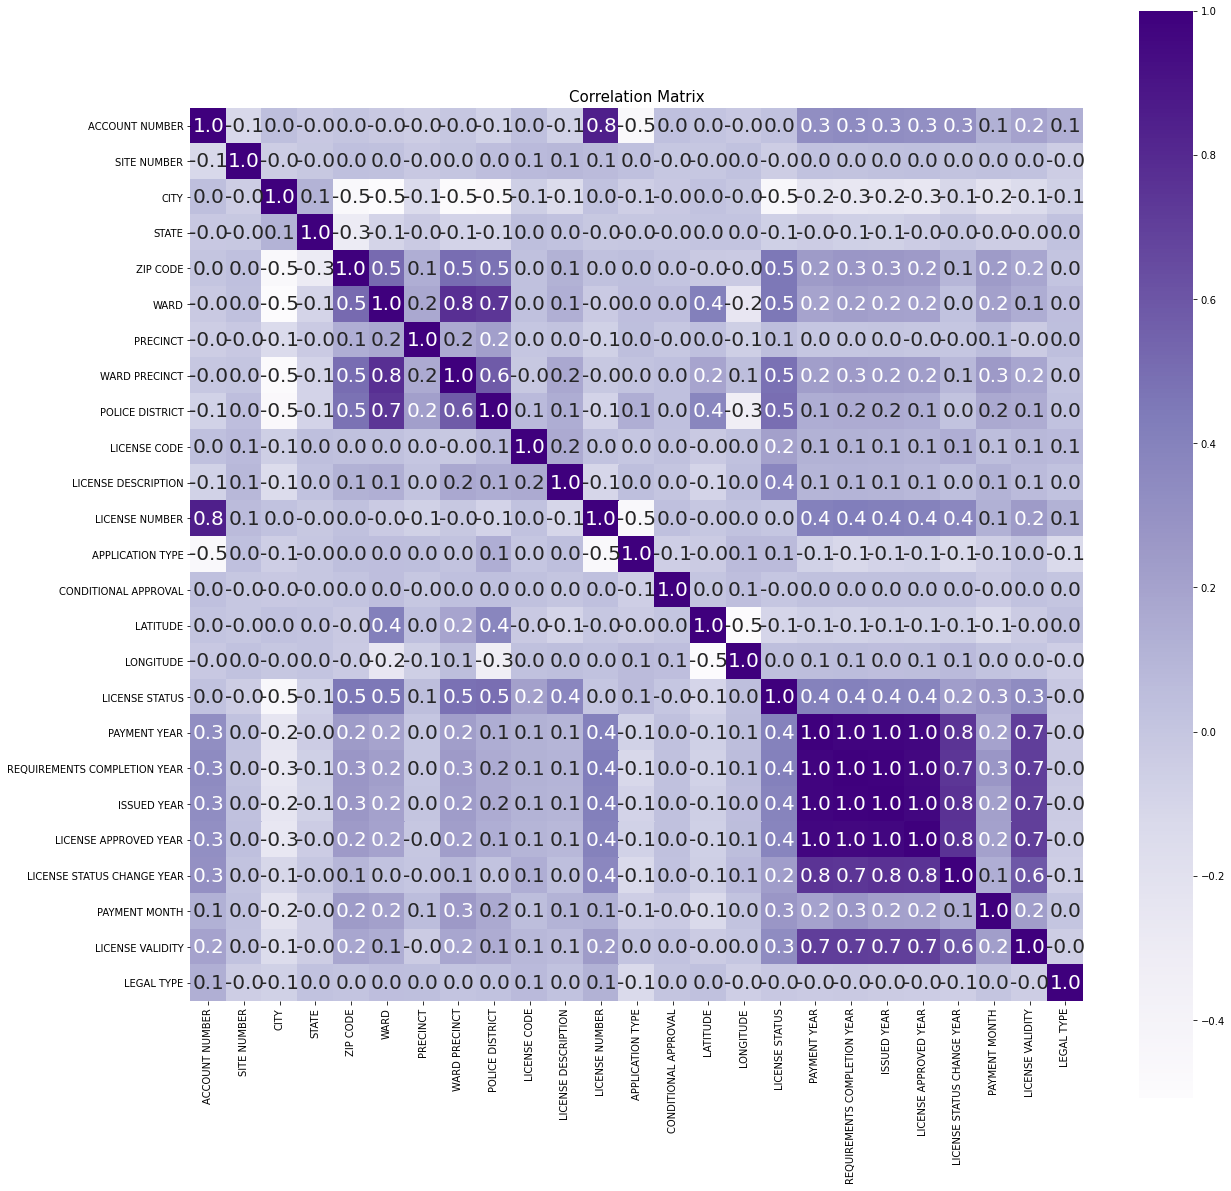

In [66]:
#Finding the correlation with the target variable:

correlation = training_data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':20}, cmap='Purples')
plt.title('Correlation Matrix', fontsize=15)
plt.show()

In [67]:
#As years are higly correlated (0.8) with each other, keeping only one of them and dropping others:
drop_list = ['PAYMENT YEAR', 'REQUIREMENTS COMPLETION YEAR', 'LICENSE APPROVED YEAR']
training_data = training_data.drop(drop_list, axis=1)
df_test = df_test.drop(drop_list, axis=1)

In [68]:
#Splitting the data
X = training_data.drop('LICENSE STATUS', axis=1)
Y = training_data['LICENSE STATUS']

In [69]:
#As the model has to be judged on confusion matrix and F1 score
from sklearn.metrics import confusion_matrix
def conf_matrix(actual, predicted):
    cm = confusion_matrix( actual, predicted, [1,0]).T
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Yes","No"] , yticklabels = ["Yes","No"] )
    plt.ylabel('Predicted_Value')
    plt.xlabel('Actual_Value')
    plt.show()

In [70]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.25, random_state = 42)

In [71]:
# Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

# Hyperparameter Optimization
parameters_to_tune = [{'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 20, 50], 
              'min_samples_split': [2, 5, 50, 100],
              'min_samples_leaf': [1, 5, 7, 10]
             }]
# Grid Search
grid_cv = GridSearchCV(clf, parameters_to_tune)
grid_search = grid_cv.fit(X_train, Y_train)
clf = grid_search.best_estimator_

# Training the model
clf.fit(X_train, Y_train)


C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


DecisionTreeClassifier(criterion='entropy', max_depth=50, max_features='log2',
                       min_samples_split=5)

In [72]:
Y_pred = clf.predict(X_test)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass labels=[1, 0] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


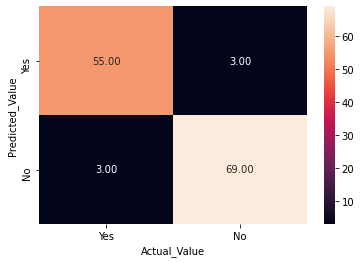

In [73]:

# Confusion matrix for decision tree classifier
conf_matrix(Y_test, Y_pred)

In [74]:
acc_dt = round( metrics.accuracy_score(Y_test, Y_pred) * 100, 2 )
print( 'Total Accuracy : ', acc_dt )

Total Accuracy :  81.53


In [99]:
from xgboost import XGBClassifier


gbm = XGBClassifier(learning_rate=0.02,scale_pos_weight=1, n_estimators=1000, objective='multi:softmax', silent=True, nthread=1, num_class=5,max_depth=4)


# Train the model using the training sets
gbm.fit(X_train, Y_train)

C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[05:58:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "scale_pos_weight", "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[05:58:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.02, max_delta_step=0,
              max_depth=4, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=1000, n_jobs=1, nthread=1,
              num_class=5, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, silent=True, subsample=1, tree_method='exact', ...)

In [100]:
# Prediction on test data
Y_pred = gbm.predict(X_test)

In [101]:
# Calculating the accuracy, precision and the recall
acc_xgb = round( metrics.accuracy_score(Y_test, Y_pred) * 100 , 2 )
print( 'Total Accuracy : ', acc_xgb )

Total Accuracy :  91.89


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass labels=[1, 0] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


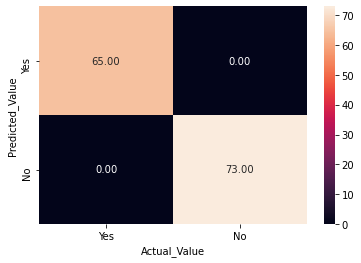

In [102]:
# Confusion matrix 
conf_matrix(Y_test, Y_pred)

In [103]:
#Predicting the test data
my_prediction = gbm.predict(df_test)

In [104]:
submission['LICENSE STATUS'] = my_prediction
submission.shape

(57239, 2)

In [105]:
submission['LICENSE STATUS'] = submission['LICENSE STATUS'].replace(0, 'AAI')
submission['LICENSE STATUS'] = submission['LICENSE STATUS'].replace(1, 'AAC')
submission['LICENSE STATUS'] = submission['LICENSE STATUS'].replace(2, 'REV')
submission['LICENSE STATUS'] = submission['LICENSE STATUS'].replace(3, 'REA')
submission['LICENSE STATUS'] = submission['LICENSE STATUS'].replace(4, 'INQ')

In [106]:
submission.head()

,ID,LICENSE STATUS
0,1516615-20120216,REV
1,69813-20110616,AAC
2,1519227-20041116,AAC
3,1922025-20100816,AAC
4,1675683-20070816,AAC


In [107]:
submission.to_csv('C:\\Users\\HP\\Downloads\\sample_submission.csv', index=False)